<a href="https://colab.research.google.com/github/pejmanrasti/From_Shallow_to_Deep/blob/main/2_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

# **Make your fist experience with Tensorflow-Keras**
Our goal is to use transfer learning to learn an accurate image classifier from a relatively small number of training samples. Generally speaking, transfer learning refers to the process of leveraging the knowledge learned in one model for the training of another model..

## Loading Training and Validation Data

we use the dataset [CalTech-101](http://www.vision.caltech.edu/Image_Datasets/Caltech101/), which contains around 9000 labeled images belonging to 101 object categories. However, we will exclude 5 of the categories which have the most images. This is in order to keep the class distribution fairly balanced (around 50-100) and constrained to a smaller number of images, around 2935.

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import os
import cv2
import random
import numpy as np
from sklearn.model_selection import train_test_split

! pip install TensorBoardColab
from tensorflow.keras.models import Sequential,Model # Model type to be used
from tensorflow.keras.layers import Dense, Activation, Dropout# Make Fully connected (FC) layers
from tensorflow.keras.utils import to_categorical # NumPy related tools
from tensorflow.keras.callbacks import TensorBoard  #Visulization of Accuracy and loss
from tensorboardcolab import TensorBoardColab, TensorBoardColabCallback
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

  Created wheel for TensorBoardColab: filename=tensorboardcolab-0.0.22-py3-none-any.whl size=3859 sha256=c52d0d9840ace4a1a8a12311f4e26f8cf7d6739aca53f21872a160c70850156c
  Stored in directory: /root/.cache/pip/wheels/69/4e/4a/1c6c267395cb10edded1050df12af165d3254cfce324e80941
Successfully built TensorBoardColab


In [3]:
from google.colab import drive
root = '/content/gdrive/'
drive.mount( root )

Mounted at /content/gdrive/


In [4]:
!unzip gdrive/My\ Drive/data_Iran/101_ObjectCategories.zip

Streaming output truncated to the last 5000 lines.
  inflating: 101_ObjectCategories/Motorbikes/image_0736.jpg  
  inflating: __MACOSX/101_ObjectCategories/Motorbikes/._image_0736.jpg  
  inflating: 101_ObjectCategories/Motorbikes/image_0078.jpg  
  inflating: __MACOSX/101_ObjectCategories/Motorbikes/._image_0078.jpg  
  inflating: 101_ObjectCategories/Motorbikes/image_0285.jpg  
  inflating: __MACOSX/101_ObjectCategories/Motorbikes/._image_0285.jpg  
  inflating: 101_ObjectCategories/Motorbikes/image_0291.jpg  
  inflating: __MACOSX/101_ObjectCategories/Motorbikes/._image_0291.jpg  
  inflating: 101_ObjectCategories/Motorbikes/image_0246.jpg  
  inflating: __MACOSX/101_ObjectCategories/Motorbikes/._image_0246.jpg  
  inflating: 101_ObjectCategories/Motorbikes/image_0520.jpg  
  inflating: __MACOSX/101_ObjectCategories/Motorbikes/._image_0520.jpg  
  inflating: 101_ObjectCategories/Motorbikes/image_0534.jpg  
  inflating: __MACOSX/101_ObjectCategories/Motorbikes/._image_0534.jpg  
  in

In [5]:
DATADIR = "101_ObjectCategories"
CATEGORIES = os.listdir(DATADIR)
print(CATEGORIES)

['Faces_easy', 'accordion', 'tick', 'wild_cat', 'joshua_tree', 'scorpion', 'mandolin', 'stop_sign', 'sunflower', 'starfish', 'hawksbill', 'strawberry', 'saxophone', 'crocodile', 'kangaroo', 'revolver', 'laptop', 'watch', 'crocodile_head', 'emu', 'Motorbikes', 'llama', 'camera', 'ibis', 'ferry', 'sea_horse', 'stapler', 'water_lilly', 'windsor_chair', 'cup', 'octopus', 'car_side', 'hedgehog', 'anchor', 'ceiling_fan', 'ketch', 'butterfly', 'rooster', 'dalmatian', 'mayfly', 'crab', 'electric_guitar', 'pyramid', 'buddha', 'inline_skate', 'chair', 'umbrella', 'barrel', 'cougar_face', 'pizza', 'airplanes', 'helicopter', 'gerenuk', 'crayfish', 'grand_piano', 'gramophone', 'binocular', 'pagoda', 'lotus', 'dragonfly', 'Leopards', 'cannon', 'euphonium', 'BACKGROUND_Google', 'ewer', 'chandelier', 'cellphone', 'bass', 'brontosaurus', 'nautilus', 'wrench', 'garfield', 'flamingo', 'dollar_bill', 'stegosaurus', 'snoopy', 'elephant', 'scissors', 'minaret', 'okapi', 'menorah', 'yin_yang', 'platypus', 'w

In [6]:
CATEGORIES = ['BACKGROUND_Google', 'Motorbikes', 'airplanes', 'Faces_easy', 'Faces']
print(CATEGORIES)

['BACKGROUND_Google', 'Motorbikes', 'airplanes', 'Faces_easy', 'Faces']


In [7]:
training_data = []
IMG_SIZE_H=224 # you need to set up a numerical value here. Useful to resize to normalize data size
IMG_SIZE_W=224 # you need to set up a numerical value here. Useful to resize to normalize data size
def create_training_data():
    for category in CATEGORIES:  # do plants and weeds

        path = os.path.join(DATADIR,category)  # create path to the labels
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=plants 1=weeds

        for img in os.listdir(path):  # iterate over each image per plants and weeds
          if img.endswith('.jpg'):
            img_array = cv2.imread(os.path.join(path,img))  # convert to array 
            new_array = cv2.resize(img_array, (IMG_SIZE_H, IMG_SIZE_W))  # resize to normalize data size
            training_data.append([new_array, class_num])  # add this to our training_data


In [8]:
create_training_data()  # Calling the function for reading images and labels
print(len(training_data)) # Printing the size of the database

2935


Preparation of data for importing to Keras

In [9]:
random.shuffle(training_data)
X = []  # An Array for images
y = []  # An Array for labels

for features,label in training_data:   # Seperation of iamegs and labels
    X.append(features)
    y.append(label)
print(np.array(X).shape) # Print the size of the database

(2935, 224, 224, 3)


In [10]:
X = np.array(X).reshape(-1, IMG_SIZE_H, IMG_SIZE_W, 3)  # Reshape data in a form that is suitable for keras
print(X.shape) # Print the size of the database

(2935, 224, 224, 3)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [12]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

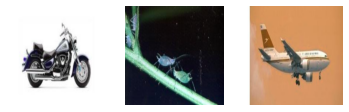

In [14]:
# Display 3 images 
plt.subplot(131)
plt.imshow(X[0,:,:,:])
plt.axis("off")
plt.subplot(132)
plt.imshow(X[10,:,:,:])
plt.axis("off")
plt.subplot(133)
plt.imshow(X[1000,:,:,:]) 
plt.axis("off")
# show the plot
plt.show()

# **Importing necessary Libraries**

### First training a neural net from scratch

Before doing the transfer learning, let's first build a neural network from scratch for doing classification on our dataset. This will give us a baseline to compare to our transfer-learned network later.

The network we will construct contains 4 alternating convolutional and max-pooling layers. After the last pooling layer, we will attach a fully-connected layer with 256 neurons then finally a softmax classification layer for our classes.



In [15]:
# normalize data
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [16]:
# build the network
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dense(5))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 activation (Activation)     (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 109, 109, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                    

In [18]:
#! pip install livelossplot
from livelossplot import PlotLossesKeras
plotlosses = PlotLossesKeras()

In [19]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10, verbose=1, mode='auto') #Stop training when a monitored metric has stopped improving.

checkpoint_filepath = 'checkpointCNN.h5'
Model_check = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto') #Callback to save the Keras model or model weights at some frequency.

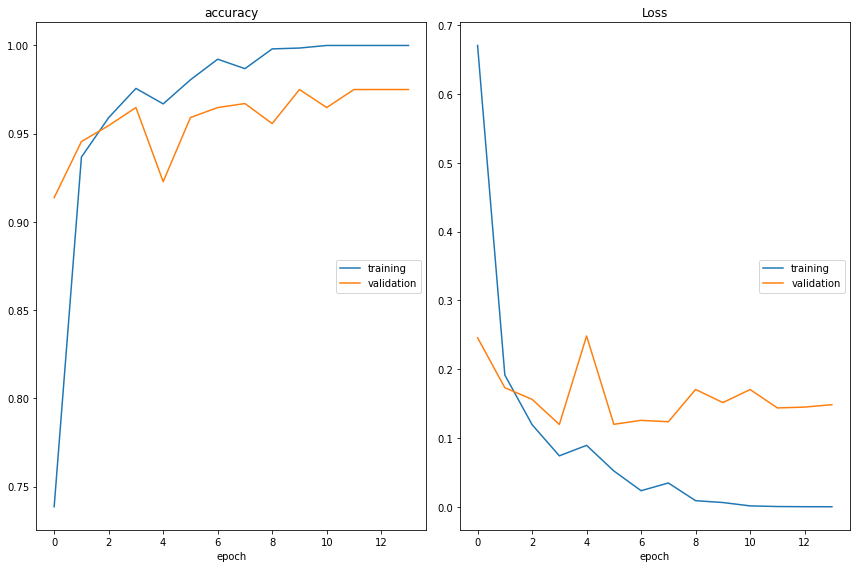

accuracy
	training         	 (min:    0.739, max:    1.000, cur:    1.000)
	validation       	 (min:    0.914, max:    0.975, cur:    0.975)
Loss
	training         	 (min:    0.000, max:    0.671, cur:    0.000)
	validation       	 (min:    0.120, max:    0.248, cur:    0.148)

Epoch 14: val_loss did not improve from 0.11966
65/65 [==============================] - 4s 56ms/step - loss: 1.2449e-04 - accuracy: 1.0000 - val_loss: 0.1485 - val_accuracy: 0.9750
Epoch 14: early stopping


In [20]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X_train, y_train, 
          validation_data=(X_test, y_test),
          epochs=50, batch_size=32,
          verbose=1,
          callbacks=[plotlosses,early_stop, Model_check])

**Evaluation and Prediction**

We can use our model to make a prediction on new images.

In [21]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0) #Evaluation of the model on the test dataset
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.14845986664295197
Test accuracy: 0.975028395652771


Finally, we see that we have achieved a (top-1) accuracy of around 97%. That's not too bad for 2935 images, considering that if we were to use a naive strategy of taking random guesses, we would have only gotten around 1% accuracy. 

## Transfer learning by starting with existing network

Now we can move on to the main strategy for training an image classifier on our small dataset: by starting with a larger and already trained network.

To start, we will load the VGG16 from keras, which was trained on ImageNet and the weights saved online. If this is your first time loading VGG16, you'll need to wait a bit for the weights to download from the web. Once the network is loaded, we can again inspect the layers with the `summary()` method.

In [22]:
vgg = tf.keras.applications.VGG16(weights='imagenet', include_top=True)
vgg.summary()

553476096/553467096 [==============================] - 9s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

Notice that VGG16 is _much_ bigger than the network we constructed earlier. It contains 13 convolutional layers and two fully connected layers at the end, and has over 138 million parameters, around 100 times as many parameters than the network we made above. Like our first network, the majority of the parameters are stored in the connections leading into the first fully-connected layer.

VGG16 was made to solve ImageNet, and achieves a [8.8% top-5 error rate](https://github.com/jcjohnson/cnn-benchmarks), which means that 91.2% of test samples were classified correctly within the top 5 predictions for each image.

In order to use this network for our task, we "remove" the final classification layer, the 1000-neuron softmax layer at the end, which corresponds to ImageNet, and instead replace it with a new softmax layer for our dataset, which contains 5 neurons in the case of our dataset. 

In terms of implementation, it's easier to simply create a copy of VGG from its input layer until the second to last layer, and then work with that, rather than modifying the VGG object directly. So technically we never "remove" anything, we just circumvent/ignore it. This can be done in the following way, by using the keras `Model` class to initialize a new model whose input layer is the same as VGG but whose output layer is our new softmax layer, called `new_classification_layer`. Note: although it appears we are duplicating this large network, internally Keras is actually just copying all the layers by reference, and thus we don't need to worry about overloading the memory.

In [23]:
# make a reference to VGG's input layer
inp = vgg.input

# make a new softmax layer with num_classes neurons
new_classification_layer = Dense(5, activation='softmax')

# connect our new layer to the second to last layer in VGG, and make a reference to it
out = new_classification_layer(vgg.layers[-2].output)

# create a new network between inp and out
model_new = Model(inp, out)


We are going to retrain this network, `model_new` on our dataset and labels. But first, we need to freeze the weights and biases in all the layers in the network, except our new one at the end, with the expectation that the features that were learned in VGG should still be fairly relevant to the new image classification task. Not optimal, but most likely better than what we can train to in our limited dataset. 

By setting the `trainable` flag in each layer false (except our new classification layer), we ensure all the weights and biases in those layers remain fixed, and we simply train the weights in the one layer at the end. In some cases, it is desirable to *not* freeze all the pre-classification layers. If your dataset has enough samples, and doesn't resemble ImageNet very much, it might be advantageous to fine-tune some of the VGG layers along with the new classifier, or possibly even all of them. To do this, you can change the below code to make more of the layers trainable.

In the case of CalTech-101, we will just do feature extraction, fearing that fine-tuning too much with this dataset may overfit. But maybe we are wrong? A good exercise would be to try out both, and compare the results.

So we go ahead and freeze the layers, and compile the new model with exactly the same optimizer and loss function as in our first network, for the sake of a fair comparison. We then run `summary` again to look at the network's architecture.

In [24]:
# make all layers untrainable by freezing weights (except for last layer)
for l, layer in enumerate(model_new.layers[:-1]):
    layer.trainable = False

# ensure the last layer is trainable/not frozen
for l, layer in enumerate(model_new.layers[-1:]):
    layer.trainable = True

model_new.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_new.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Looking at the summary, we see the network is identical to the VGG model we instantiated earlier, except the last layer, formerly a 1000-neuron softmax, has been replaced by a new 5-neuron softmax. Additionally, we still have roughly 134 million weights, but now the vast majority of them are "non-trainable params" because we froze the layers they are contained in. We now only have 20,485 trainable parameters, which is actually less than 2% of the number of parameters needed to train the first model.

As before, we go ahead and train the new model, using the same hyperparameters (batch size and number of epochs) as before, along with the same optimization algorithm. We also keep track of its history by tensorboard.

In [27]:
plotlossesTransfer = PlotLossesKeras()

checkpoint_filepath_transfer = 'checkpointTransfer.h5'

Model_check_transfer = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_filepath_transfer, monitor='val_loss', verbose=1, save_best_only=True, mode='auto') #Callback to save the Keras model or model weights at some frequency.

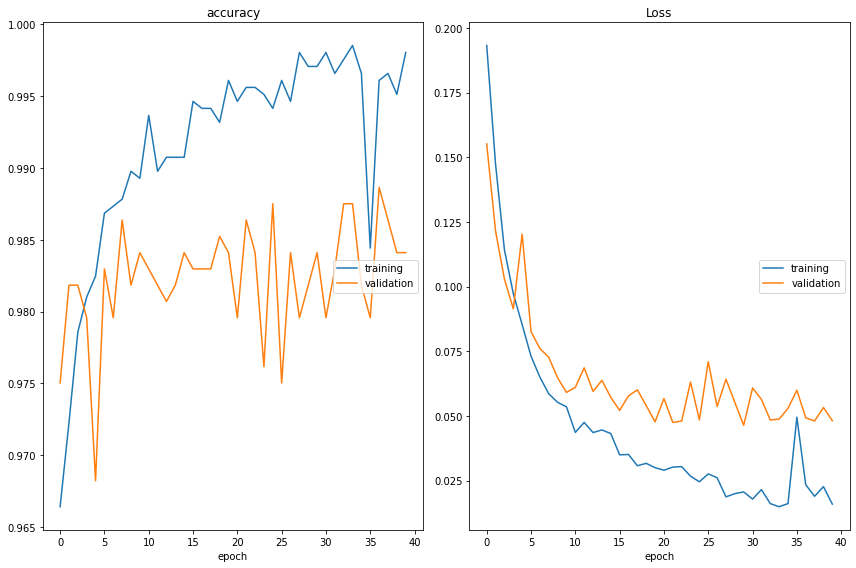

accuracy
	training         	 (min:    0.966, max:    0.999, cur:    0.998)
	validation       	 (min:    0.968, max:    0.989, cur:    0.984)
Loss
	training         	 (min:    0.015, max:    0.193, cur:    0.016)
	validation       	 (min:    0.046, max:    0.155, cur:    0.048)

Epoch 40: val_loss did not improve from 0.04638
65/65 [==============================] - 16s 242ms/step - loss: 0.0159 - accuracy: 0.9981 - val_loss: 0.0482 - val_accuracy: 0.9841
Epoch 40: early stopping


In [28]:
model_new.fit(X_train, y_train, 
          validation_data=(X_test, y_test),
          epochs=100, batch_size=32,
          verbose=1,
          callbacks=[plotlossesTransfer,early_stop, Model_check_transfer])

Our validation accuracy hovers close to 98% towards the end, which is more than 2% improvement on the original network trained from scratch. 


**Evaluation and Prediction**

We can use our model to make a prediction on new images.

In [29]:
model_New_load = tf.keras.models.load_model('checkpointTransfer.h5')
loss, accuracy = model_New_load.evaluate(X_test, y_test, verbose=0) #Evaluation of the model on the test dataset
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.046376846730709076
Test accuracy: 0.9841089844703674
